In [39]:
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

In [40]:
file = open('adult.txt', 'r',errors='ignore')
# read all text
adult = file.read()
file = open('violence.txt', 'r',errors='ignore')
violence = file.read()

In [41]:
adult = adult.split('\n')
violence = violence.split('\n')

In [42]:
data = adult+violence

In [43]:
tokenizer = Tokenizer()

In [44]:
tokenizer.fit_on_texts(data)

In [45]:
encoded_docs = tokenizer.texts_to_sequences(data)

In [46]:
max_length = max([len(s.split()) for s in data])

In [47]:
data= pad_sequences(encoded_docs,maxlen= max_length,padding='post')

In [48]:
labels = np.array([0 for _ in range(len(adult))] + [1 for _ in range(len(violence))])

In [49]:
oe_enc = OneHotEncoder()
labels = oe_enc.fit_transform(np.array(labels).reshape(-1,1))

C:\Users\soura\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [50]:
vocab_size = len(tokenizer.word_index)+1

In [51]:
data,labels = shuffle(data,labels)

In [58]:
def plot_accuracy(x,history_cnn):
    plt.figure(figsize=(15,5))
    plt.subplot(121)
    plt.title("Accuracy comparison")
    plt.plot(x,history_cnn.history['acc'],label='Train')
    plt.plot(x,history_cnn.history['val_acc'],label='Test')
    plt.legend()
    plt.show()

def plot_loss(x,history_cnn):
    plt.figure(figsize=(15,5))
    plt.subplot(121)
    plt.title("Loss comparison")
    plt.plot(x,history_cnn.history['loss'],label='Train')
    plt.plot(x,history_cnn.history['val_loss'],label='Test')
    plt.legend()
    plt.show()

In [53]:
X_train,X_test,Y_train,Y_test = train_test_split(data,labels.toarray(),stratify=labels.toarray(),random_state=42)
epochs = 25

In [54]:
model = Sequential()
model.add(Embedding(vocab_size,100,input_length = max_length))
model.add(Conv1D(filters=32,kernel_size=8,activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(10,activation='relu'))
model.add(Dense(2,activation='sigmoid'))
print(model.summary(model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])))
history = model.fit(X_train,Y_train,epochs=epochs,verbose=1,validation_data = (X_test,Y_test),batch_size=4)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 18, 100)           15400     
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 11, 32)            25632     
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 5, 32)             0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1610      
_________________________________________________________________
dense_10 (Dense)             (None, 2)                 22        
Total params: 42,664
Trainable params: 42,664
Non-trainable params: 0
__________________________________________________

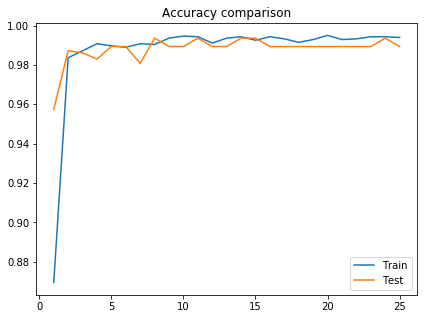

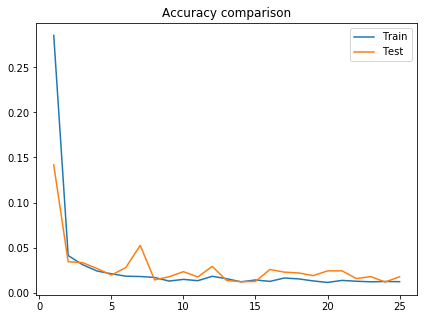

In [55]:
x = [i for i in range(1,epochs+1)]
plot_accuracy(x,history)
plot_loss(x,history)

In [56]:
test = adult[0].split()
tokenizer = Tokenizer()
tokenizer.fit_on_texts(test)
encoded_docs = tokenizer.texts_to_sequences(test)
test= pad_sequences(encoded_docs,maxlen= max_length,padding='post')

In [57]:
model.predict(test)

array([[1.9028187e-02, 9.8284203e-01],
       [9.9645984e-01, 5.3445697e-03],
       [9.9652004e-01, 5.2277148e-03],
       [9.9466383e-01, 7.5831413e-03],
       [9.9920726e-01, 1.3593435e-03],
       [9.9997300e-01, 6.1482191e-05],
       [1.0461718e-02, 9.9100935e-01],
       [1.5400523e-01, 8.4765595e-01],
       [7.6728952e-01, 2.2125635e-01],
       [8.7691098e-01, 1.1266565e-01],
       [8.5451603e-01, 1.3382515e-01],
       [9.9996251e-01, 8.3029270e-05],
       [2.7120113e-05, 9.9998629e-01],
       [4.0065289e-02, 9.6077192e-01]], dtype=float32)